In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
upload = files.upload()

Saving movies.csv to movies (1).csv


In [ ]:
movie_titles = pd.read_csv("movies.csv")
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
from google.colab import files
upload = files.upload()

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df = pd.merge(df,movie_titles, on = "movieId")

df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


**Visualization Imports**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

Movies with high score might be very minority that only a few people rate it. 
For movies that most people will like should be high rated with lots of people

In [ ]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [ ]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


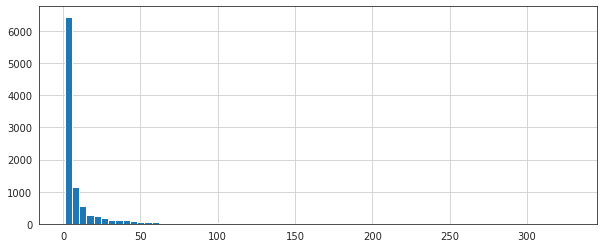

In [ ]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins = 70)

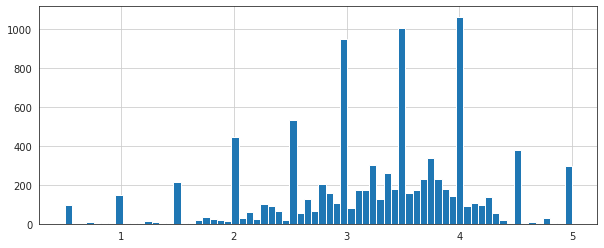

In [ ]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

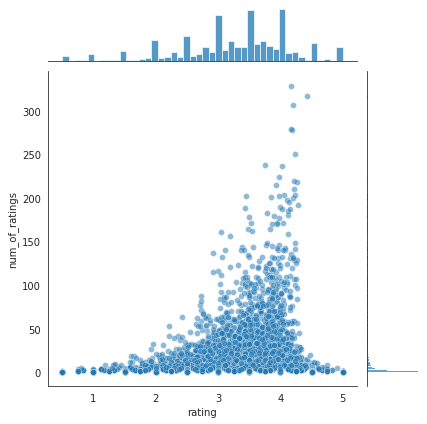

In [ ]:
sns.jointplot(x = 'rating',y = 'num_of_ratings', data = ratings, alpha = 0.5)

In [ ]:
moviemat = df.pivot_table(index='userId', columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.sort_values('num_of_ratings',ascending=False).head(10)

,rating,num_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [ ]:
ForestGump_user_rating = moviemat['Forrest Gump (1994)']
IronMan_user_rating=moviemat['Iron Man (2008)']
ForestGump_user_rating

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [ ]:
similar_to_ForestGump = moviemat.corrwith(ForestGump_user_rating)
similar_to_IronMan = moviemat.corrwith(IronMan_user_rating)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
corr_ForestGump = pd.DataFrame(similar_to_ForestGump,columns=['Correlation'])
corr_ForestGump.dropna(inplace=True) # drop of NA
corr_ForestGump.sort_values("Correlation",ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


Filter out view less than 50
Recommandation after Watching *Forrest Gump* 

In [ ]:
corr_ForestGump = corr_ForestGump.join(ratings['num_of_ratings'])
corr_ForestGump[corr_ForestGump['num_of_ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


In [ ]:
corr_IronMan = pd.DataFrame(similar_to_IronMan,columns=['Correlation'])
corr_IronMan.dropna(inplace=True) # drop of NA


Recommandation after Watching *Iron Man*

In [ ]:
corr_IronMan = corr_IronMan.join(ratings['num_of_ratings'])
corr_IronMan[corr_IronMan['num_of_ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
title,,
Iron Man (2008),1.000000,94
Desperado (1995),0.791394,66
"Client, The (1994)",0.716115,57
Star Trek (2009),0.687861,59
"Avengers, The (2012)",0.684344,69
